## Introduction

Do swarmalators sync faster than oscillators?

### Test Kuramoto model

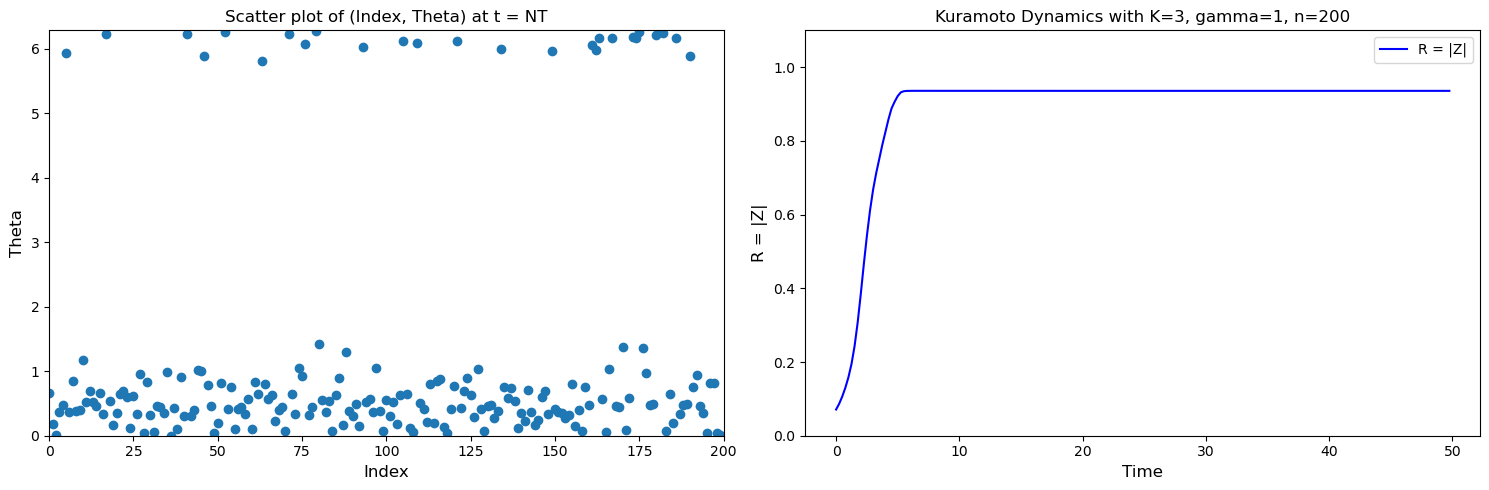

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Initial setups
dt, T, n = 0.25, 50, 200
K, gamma = 3, 1  
#omega_dist = 'uniform_deterministic'
omega_dist = 'gaussian_random'
omega = make_omega(mu, gamma,n, omega_dist=omega_dist)
z0 = np.random.uniform(0,2*np.pi,n)
(t,NT) = (0,int(T/dt))
args = (K,omega)

# Simulation loop
z = z0
Zs = []
ts = []
for t in range(NT):
    Z = find_sync_order_parameter(z)
    Zs.append(Z)
    z = rk4(dt, z, rhs_kuramoto, args)
    ts.append(t * dt)
              
# Data extraction
R = [np.abs(Z) for Z in Zs]
theta_final = np.mod(z, 2*np.pi)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Scatter plot of (index, theta) at t = NT
indices = np.arange(n)
ax[0].scatter(indices, theta_final)
ax[0].set_xlim([0, n])
ax[0].set_ylim([0, 2*np.pi])
ax[0].set_xlabel('Index', fontsize=12)
ax[0].set_ylabel('Theta', fontsize=12)
ax[0].set_title('Scatter plot of (Index, Theta) at t = NT')

# Right plot: Dynamics of R over time
ax[1].plot(ts, R, label="R = |Z|", color="blue")
ax[1].set_xlabel('Time', fontsize=12)
ax[1].set_ylabel('R = |Z|', fontsize=12)
ax[1].set_title(f"Kuramoto Dynamics with K={K}, gamma={gamma}, n={n}")
ax[1].set_ylim([0, 1.1])
ax[1].legend()

plt.tight_layout()
plt.show()


### Test swarmalator model

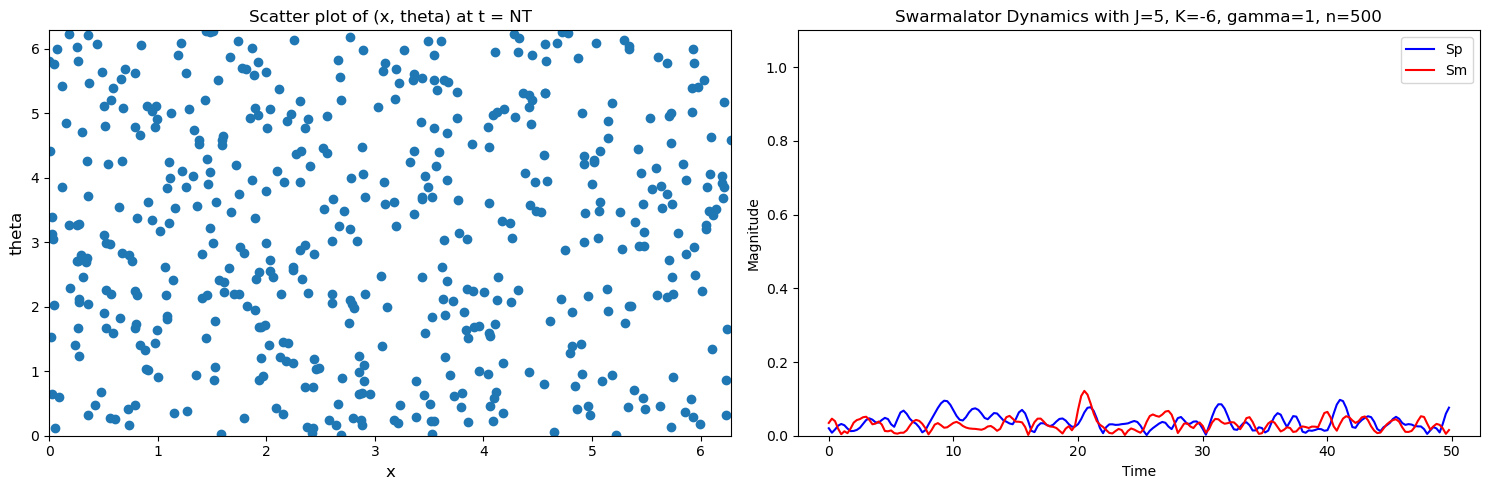

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Initial setups
dt, T, n = 0.25, 50, 500

J, K, mu, gamma = 5, 6, 0, 1  # sync
J, K, mu, gamma = 0.5, 6, 0, 1  # phase wave
J, K, mu, gamma = 1.5, 8, 0, 1  # mixed
J, K, mu, gamma = 5, -6, 0, 1  # async

omega_dist = 'gaussian_random'
omega, nu = make_omega(mu, gamma,n, omega_dist=omega_dist), make_omega(mu, gamma,n,omega_dist=omega_dist) 
(x0,theta0) = np.random.uniform(0,2*np.pi,n), np.random.uniform(0,2*np.pi,n)
z0 = np.concatenate([x0, theta0])
(t,NT) = (0,int(T/dt))
args = (J,K,nu,omega)

# Simulation loop
z = z0
Ws = []
ts = []
for t in range(NT):
    Wp, Wm = find_rainbow_order_parameters(z)
    Ws.append((Wp, Wm))
    z = rk4(dt, z, rhs_swarmlator, args)
    ts.append(t * dt)
              
# Data extraction
Sp = [np.abs(wp) for wp, _ in Ws]
Sm = [np.abs(wm) for _, wm in Ws]
x_final, theta_final = np.mod(z[:n], 2*np.pi), np.mod(z[n:], 2*np.pi)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Scatter plot of (x, theta) at t = NT
ax[0].scatter(x_final, theta_final)
ax[0].set_xlim([0, 2*np.pi])
ax[0].set_ylim([0, 2*np.pi])
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_ylabel('theta', fontsize=12)
ax[0].set_title('Scatter plot of (x, theta) at t = NT')

# Right plot: Dynamics of Sp and Sm over time
ax[1].plot(ts, Sp, label="Sp", color="blue")
ax[1].plot(ts, Sm, label="Sm", color="red")
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitude')
ax[1].set_title(f"Swarmalator Dynamics with J={J}, K={K}, gamma={gamma}, n={n}")
ax[1].legend()
ax[1].set_ylim([0, 1.1])

plt.tight_layout()
plt.show()
